In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/atefajmal/Desktop/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
# Read your api key environment variable
load_dotenv()
from newsapi.newsapi_client import NewsApiClient

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [6]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy")

In [7]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language= "en",
    sort_by="relevancy")

In [8]:
bitcoin= []
for i in bitcoin_headlines["articles"]:
    try:
        text = i["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        bitcoin.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass

bitcoin_df= pd.DataFrame(bitcoin)
bitcoin_df.head()

,Text,Compound,Positive,Negative,Neutral
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.160,0.840
1,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935
2,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872
3,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.000,1.000
4,"July 15 was, at first, just another day for Pa...",0.0000,0.000,0.000,1.000


In [9]:
ethereum= []
for i in ethereum_headlines["articles"]:
    try:
        text = i["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        ethereum.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass

ethereum_df= pd.DataFrame(ethereum)
ethereum_df.head()

,Text,Compound,Positive,Negative,Neutral
0,TL;DR: The Complete Stock and Cryptocurrency I...,0.000,0.00,0.000,1.000
1,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.000,0.00,0.000,1.000
2,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.296,0.00,0.061,0.939
3,Our robot colleague Satoshi Nakaboto writes ab...,0.507,0.09,0.000,0.910
4,US President Donald Trump and First Lady Melan...,0.000,0.00,0.000,1.000


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.281175,0.061750,0.014400,0.923850
std,0.368322,0.041842,0.044625,0.043245
min,-0.690800,0.000000,0.000000,0.840000
25%,0.000000,0.000000,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.916250
max,0.507000,0.090000,0.160000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.152016,0.057368,0.031211,0.911421
std,0.351904,0.063256,0.044840,0.073848
min,-0.659700,0.000000,0.000000,0.766000
25%,0.000000,0.000000,0.000000,0.856500
50%,0.226300,0.065000,0.000000,0.924000
75%,0.464250,0.091500,0.059000,0.970500
max,0.624900,0.198000,0.162000,1.000000


## Questions:
#### Q: Which coin had the highest mean positive score?
#### A: Ethereum had the highest mean positive score (0.068368)

#### Q: Which coin had the highest compound score?
#### A: Ethereum had the highest compound score (0.750600)

#### Q: Which coin had the highest positive score?
#### A: Ethereum had the highest positive score (0.209000)

## Tokenizer

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [76]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("'s")
stop.append("''")
stop.append("n't")
stop.append("char")
stop.append("...")

In [77]:
# I could not figure out this whole process of tokenization so I copied this cell from the solutions

def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens


In [78]:
bitcoin_df["tokens"] = bitcoin_df.Text.apply(tokenizer)
bitcoin_df.head()

,Text,Compound,Positive,Negative,Neutral,tokens
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.160,0.840,"[Two, alleged, crypto, trader, Singapore, appa..."
1,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935,"[Image, copyrightChandler, GuoImage, caption, ..."
2,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872,"[US, district, judge, sentenced, UK, National,..."
3,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.000,1.000,"[Alexis, Akwagyiram, Tom, Wilson, Monthly, cry..."
4,"July 15 was, at first, just another day for Pa...",0.0000,0.000,0.000,1.000,"[July, 15, first, another, day, Parag, Agrawal..."


In [79]:
ethereum_df["tokens"] = ethereum_df.Text.apply(tokenizer)
ethereum_df.head()

,Text,Compound,Positive,Negative,Neutral,tokens
0,TL;DR: The Complete Stock and Cryptocurrency I...,0.000,0.00,0.000,1.000,"[TL, DR, Complete, Stock, Cryptocurrency, Inve..."
1,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.000,0.00,0.000,1.000,"[September, 18, 2020, 6, min, read, Opinions, ..."
2,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.296,0.00,0.061,0.939,"[September, 30, 2020, 8, min, read, Opinions, ..."
3,Our robot colleague Satoshi Nakaboto writes ab...,0.507,0.09,0.000,0.910,"[robot, colleague, Satoshi, Nakaboto, writes, ..."
4,US President Donald Trump and First Lady Melan...,0.000,0.00,0.000,1.000,"[US, President, Donald, Trump, First, Lady, Me..."


## NGrams and Frequency Analysis

In [48]:
from collections import Counter
from nltk import ngrams

In [94]:
btc_ngram = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
ngram_counts = Counter(ngrams(btc_ngram, n=2))
ngram_counts.most_common(20)

[(('Satoshi', 'Nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'Satoshi'), 13),
 (('Nakaboto', 'writes'), 13),
 (('writes', 'Bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'day'), 13),
 (('day', 'Welcome'), 13),
 (('Welcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'Bitcoin'), 13),
 (('Bitcoin', 'Today'), 13),
 (('Today', 'Satoshi'), 13),
 (('Nakaboto', 'tell'), 13),
 (('tell', 'whats'), 13),
 (('whats', 'going'), 13),
 (('going', 'Bitcoin'), 13),
 (('Bitcoin', '…'), 13),
 (('Bitcoin', 'BTC'), 10)]

In [95]:
eth_ngram = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
ngram_counts = Counter(ngrams(eth_ngram, n=2))
ngram_counts.most_common(20)

[(('Satoshi', 'Nakaboto'), 4),
 (('char', 'September'), 3),
 (('Getty', 'Images'), 3),
 (('min', 'read'), 2),
 (('read', 'Opinions'), 2),
 (('Opinions', 'expressed'), 2),
 (('expressed', 'Entrepreneur'), 2),
 (('Entrepreneur', 'contributor'), 2),
 (('char', 'robot'), 2),
 (('robot', 'colleague'), 2),
 (('colleague', 'Satoshi'), 2),
 (('Nakaboto', 'writes'), 2),
 (('writes', 'Bitcoin'), 2),
 (('Bitcoin', 'BTC'), 2),
 (('BTC', 'every'), 2),
 (('every', 'fucking'), 2),
 (('fucking', 'day'), 2),
 (('day', 'Welcome'), 2),
 (('Welcome', 'another'), 2),
 (('another', 'edition'), 2)]

In [82]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [96]:
# Get the top 10 words
token_count(btc_ngram)

[('Bitcoin', 39),
 ('Satoshi', 26),
 ('Nakaboto', 26),
 ('char', 20),
 ('…', 14),
 ('another', 14),
 ('day', 14),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13)]

In [97]:
token_count(eth_ngram)

[('char', 19),
 ('cryptocurrency', 8),
 ('Bitcoin', 8),
 ('September', 5),
 ('2020', 5),
 ('Ethereum', 5),
 ('Satoshi', 4),
 ('Nakaboto', 4),
 ('Getty', 3),
 ('Images', 3)]

## Word Clouds

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

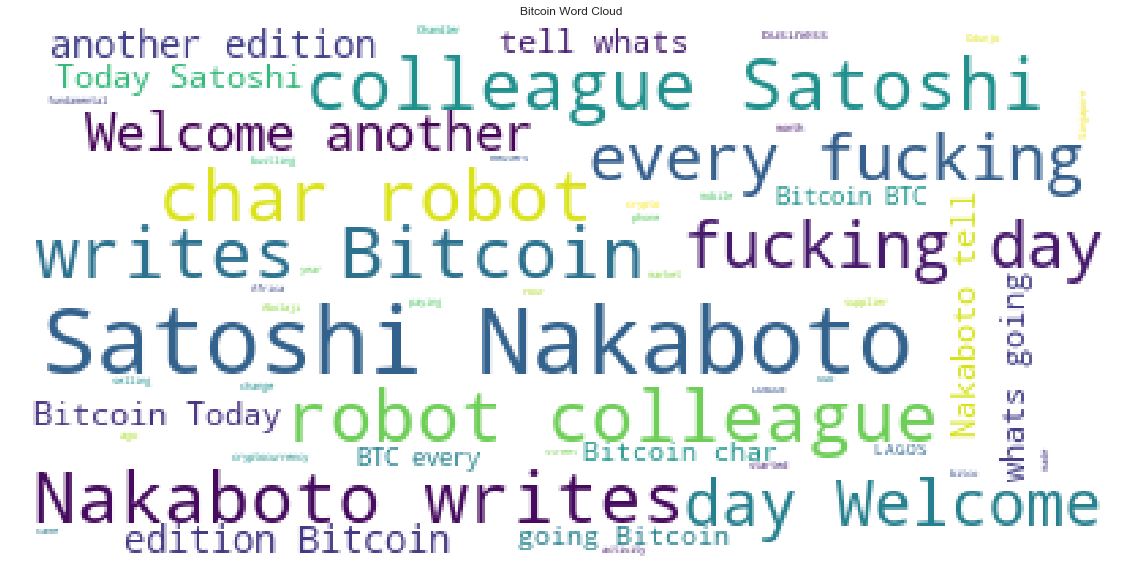

In [101]:
wordcloud = WordCloud(background_color='white').generate(" ".join(btc_ngram))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud")
plt.show()

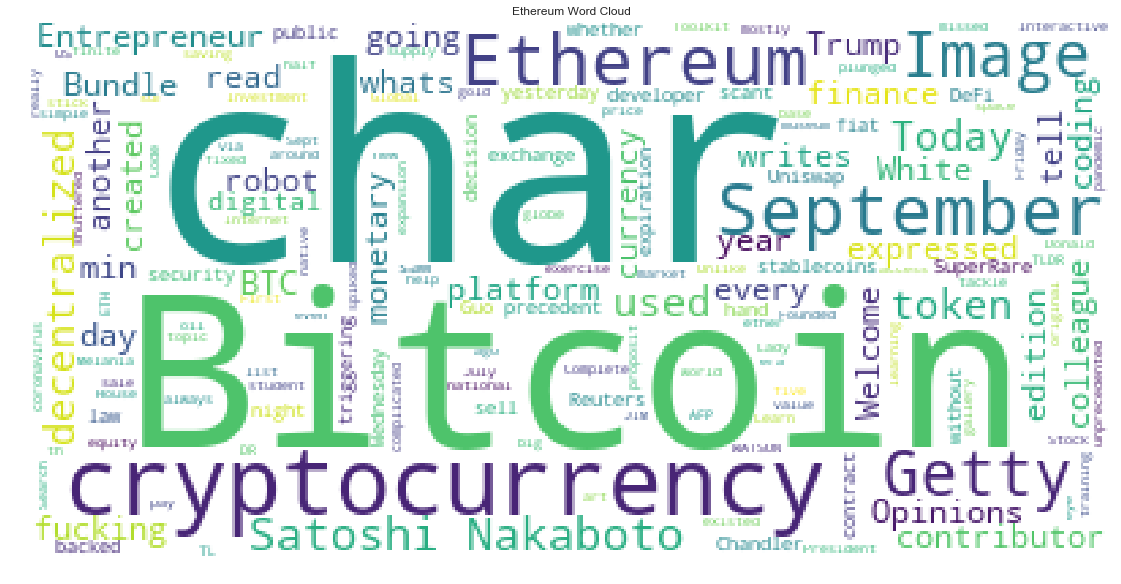

In [102]:
wordcloud = WordCloud(background_color='white').generate(" ".join(eth_ngram))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud")
plt.show()

In [103]:
import spacy
from spacy import displacy

In [105]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [106]:
# Concatenate all of the bitcoin text together
joined_btc_text = bitcoin_df.Text.str.cat()
joined_btc_text

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars]A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]July 15 was, at first, just another day for Parag Agrawal, the chief technology officer of Twitter. Everything seemed normal on the se

In [113]:
# Run the NER processor on all of the text
btc_doc = nlp(joined_btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [114]:
displacy.render(btc_doc, style='ent', jupyter=True)

In [115]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
US GPE
five years DATE
The Dark Overlord WORK_OF_ART
Nathan Wyatt PERSON
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
chars]July 15 DATE
first ORDINAL
Parag Agrawal ORG
Twitter ORG
Travis Scot PERSON
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi 

## Ethereum NER

In [117]:
# Concatenate all of the bitcoin text together
joined_eth_text = ethereum_df.Text.str.cat()
joined_eth_text

'TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]September\r\n30, 2020\r\n8 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3081 chars]US President Donald Trump and First Lady Melania Trump in the White House on July 7, 2020.\r\nJIM WATSON/AFP via Getty I

In [118]:
# Run the NER processor on all of the text
eth_doc = nlp(joined_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [119]:
displacy.render(eth_doc, style='ent', jupyter=True)

In [120]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
30 DATE
2020 DATE
8 CARDINAL
half CARDINAL
2020 DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Donald Trump PERSON
First ORDINAL
Lady Melania Trump PERSON
the White House ORG
July 7, 2020 DATE
JIM WATSON PERSON
Getty Images ORG
Friday DATE
chars]Bitcoin DATE
an era DATE
Bitcoins ORG
SuperRare ORG
SuperRare ORG
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
SEC ORG
OCC ORG
fiat ORG
yesterday DATE
fiat ORG
this year DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Yuriko Nakao PERSON
Yesterday DATE
today DATE
Bitcoin GPE
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
458,000 CARDINAL
Sept